# Import Library

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1131)>

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.duplicated('CustomerId').sum()

In [ ]:
df=df.set_index('CustomerId')

In [ ]:
df.info() #object indicate - catogerical variable

# Encoding

In [ ]:
df['Geography'].value_counts()

In [ ]:
df.replace({'Geography': {'France': 2,'Germany' : 1, 'Spain': 0}},inplace=True ) # encode

In [ ]:
df['Gender'].value_counts()

In [ ]:
df.replace({'Gender': {'Male': 0, 'Female':1}},inplace=True) #encode

In [ ]:
df['Num Of Products'].value_counts()

In [ ]:
df.replace({'Num Of Products': {1: 0,2:1,3:1,4:1}},inplace=True) #2,3 and 4 all are in same category bcz of less val as compare to 1

In [ ]:
df['Has Credit Card'].value_counts()

In [ ]:
df['Is Active Member'].value_counts()

In [147]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [148]:
df['Zero Balance'] =np.where(df['Balance']>0,1,0)

<AxesSubplot:>

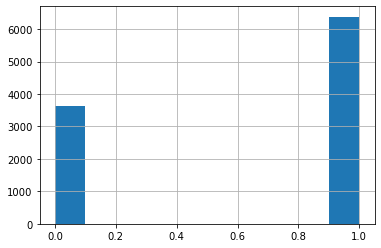

In [149]:
df['Zero Balance'].hist()

In [150]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and features

In [151]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [152]:
X = df.drop(['Surname', 'Churn'],axis =1)

In [153]:
y = df['Churn']

In [154]:
X.shape,y.shape

((10000, 11), (10000,))

# Handling imbalance Data

**class imbalance is a common problem in machine learning, especially in classification problems as ml algo are designed to maximize accuracy and reduce errors. If the data set is imbalance then in such cases, jsut by predicting the majority class we get a pretty high accurarcy, but fails to capture the minority class, which is most often the point of creating the model in the first place. likein**

1.Fraud detection

2.spam filtering

3.disease screening

4.online sales churn

5.advertising click-throughs

**Undersampling** can be defined as removing some observations of the majority class. this is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data-think millions of rows. but a drawback to Undersampling is that we are removing information that may be valuable

in Undersampling, the simplest technique involves removing random records from the majority class which can cause loss of info

a drawback to consider when Undersampling is that it can cause overfitting and poor generalization to your test set.

**oversampling** can be deined as adding more copies to the minority class. oversampling can bea good choice when you dont have a ton of data to work with

the simplest implementation of over sampling is to duplicate random records from the minority class wich can cause overfitting.

In [155]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

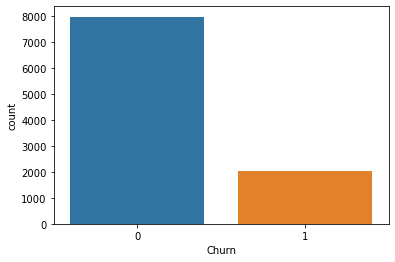

In [156]:
sns.countplot(x = 'Churn', data =df);

In [157]:
X.shape,y.shape

((10000, 11), (10000,))

# Random Under Sampling

In [158]:
from imblearn.under_sampling import RandomUnderSampler

In [159]:
# pip install imblearn

In [160]:
rus =RandomUnderSampler(random_state=2529)

In [161]:
X_rus, y_rus = rus.fit_resample(X,y)

In [162]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [163]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [164]:
y_rus.value_counts()  #undersampling apply

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

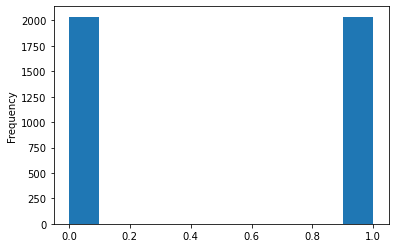

In [165]:
y_rus.plot(kind ='hist')

# Random Over Sampling

In [166]:
from imblearn.over_sampling import RandomOverSampler

In [167]:
ros = RandomUnderSampler(random_state=2529)

In [168]:
X_ros, y_ros = ros.fit_resample(X,y)

In [169]:
X_ros.shape, y_ros.shape, X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [170]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [171]:
y_ros.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

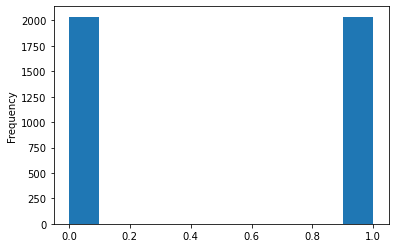

In [172]:
y_ros.plot(kind ='hist')

**Train Test Split**

In [173]:
from sklearn.model_selection import train_test_split

**Split Original Data**

In [174]:
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.3,random_state =2529)

**Split Random Under Sample Data**

In [175]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size=0.3,random_state =2529)

**Split Random Over Sample Data**

In [176]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros,y_ros, test_size=0.3,random_state =2529)

**Standardize Features**

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
sc= StandardScaler()

**satandarize Original Data**

In [179]:
X_train[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])

In [180]:
X_test[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])

**Standardize Random under sample Data**

In [181]:
X_train_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])

In [182]:
X_test_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])

# Support Vector machine Classifier

In [183]:
from sklearn.svm import SVC

In [184]:
svc = SVC()

In [185]:
svc.fit(X_train,y_train)

SVC()

In [186]:
y_pred=svc.predict(X_test)

# Model Accuracy

In [188]:
from sklearn.metrics import confusion_matrix, classification_report

In [189]:
confusion_matrix(y_test,y_pred)

array([[2390,   24],
       [ 459,  127]], dtype=int64)

In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.84      0.22      0.34       586

    accuracy                           0.84      3000
   macro avg       0.84      0.60      0.63      3000
weighted avg       0.84      0.84      0.80      3000



# Hyperparameter Tunning

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
param_grid = {'C':[0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf'],
             'class_weight':['balanced']}

In [193]:
grid=GridSearchCV(SVC(),param_grid,refit=True, verbose=2, cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [196]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [197]:
grid_predictions=grid.predict(X_test)

In [198]:
confusion_matrix(y_test, grid_predictions)

array([[2016,  398],
       [ 255,  331]], dtype=int64)

In [199]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2414
           1       0.45      0.56      0.50       586

    accuracy                           0.78      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.80      0.78      0.79      3000



# Model with Random under sampling

In [200]:
svc_rus=SVC()

In [201]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [202]:
y_pred_rus=svc_rus.predict(X_test_rus)

# Model Accuracy

In [203]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[627,   0],
       [596,   0]], dtype=int64)

In [206]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       627
           1       0.00      0.00      0.00       596

    accuracy                           0.51      1223
   macro avg       0.26      0.50      0.34      1223
weighted avg       0.26      0.51      0.35      1223



C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tunning

In [207]:
param_grid={'C':[0.0,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}

In [208]:
grid_rus = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 333, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.0, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [210]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [211]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [212]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[627,   0],
       [596,   0]], dtype=int64)

In [213]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       627
           1       0.00      0.00      0.00       596

    accuracy                           0.51      1223
   macro avg       0.26      0.50      0.34      1223
weighted avg       0.26      0.51      0.35      1223



C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model with random over sampling

In [214]:
svc_ros=SVC()

In [215]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [216]:
y_pred_ros=svc_ros.predict(X_test_ros)

# Model accuracy

In [217]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[627,   0],
       [596,   0]], dtype=int64)

In [218]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       627
           1       0.00      0.00      0.00       596

    accuracy                           0.51      1223
   macro avg       0.26      0.50      0.34      1223
weighted avg       0.26      0.51      0.35      1223



C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tunning

In [219]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}

In [221]:
grid_ros = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [222]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.01)


In [223]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [224]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[  0, 627],
       [  0, 596]], dtype=int64)

In [225]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2414
           1       0.45      0.56      0.50       586

    accuracy                           0.78      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.80      0.78      0.79      3000



In [227]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       627
           1       0.00      0.00      0.00       596

    accuracy                           0.51      1223
   macro avg       0.26      0.50      0.34      1223
weighted avg       0.26      0.51      0.35      1223



C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       627
           1       0.00      0.00      0.00       596

    accuracy                           0.51      1223
   macro avg       0.26      0.50      0.34      1223
weighted avg       0.26      0.51      0.35      1223



C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       627
           1       0.00      0.00      0.00       596

    accuracy                           0.51      1223
   macro avg       0.26      0.50      0.34      1223
weighted avg       0.26      0.51      0.35      1223



C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHIRAJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
